# Redes Neuronales
## Trabajo Práctico N° 1 - Ejercicio 1
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

### Consultas y/o dudas
* Métricas del modelo (Matriz de confusión, exactitud, precisión, etc.)
* Procesamiento de los datos? (Filtrado)
* CountVectorizer, es necesario que lo hagamos a mano o podemos utilizar la librería de sci-kit-learn?
* Filtrado de numeros
* Filtrado de palabras

### Step by step
* Obtención del dataset (separando entre "train" y "test")
* Preprocesamiento de los datos
* Distribuciones condicionales (Verosimilitudes/Likelihood)
* Smoothing
* Probabilidad a Priori
* Clasificación (Naive Bayes Multinomial)
* Clasificación usando log posteriori
* Métricas

### ¡TODO! Agregar explicación del problema a resolver, identificando las variables, distribuciones de probabilidad.

In [178]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

# Loading the datasets
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

# Categories
categories = train.target_names

# Train dataset, casting to numpy array
train_data = np.array(train.data)
train_target = np.array(train.target)
train_size = len(train_data)

# Test dataset, casting to numpy array
test_data = np.array(test.data)
test_target = np.array(test.target)
test_size = len(test_data)

print(f'Using {test_size} data elements for test dataset and {train_size} data elements for train dataset')

Using 7532 data elements for test dataset and 11314 data elements for train dataset


### Algo sobre estadística o análisis de la base de datos ( ? )

In [136]:
# Show the news categories
print('Categories')
print(train_categories)

Categories
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### TODO! Agregar labels para cada posible categoria, más lindo el histograma y explicar la PROBABILIDAD A PRIORI

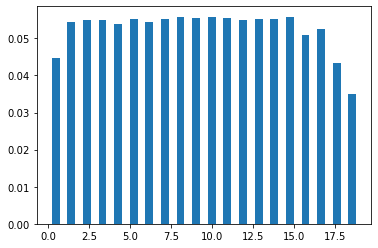

In [137]:
from matplotlib import pyplot as plt

# Histogram for the categories in the training set
priori, _, _ = plt.hist(train_target, bins=len(train_categories), range=(0,len(train_categories)-1), rwidth=0.5, density=True)
plt.show()

In [138]:
print(priori.shape)

(20,)


### Preprocesamiento

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

# Importing and testing the CountVectorizer class of sklearn
vectorizer = CountVectorizer(analyzer='word', stop_words='english', min_df=0.01)
feature_matrix = vectorizer.fit_transform(train_data)

In [140]:
print(feature_matrix.shape)

(11314, 1921)


## Cálculo de las likelihoods, distribucion para cada categoria, falta smoothing

In [161]:
# Separate the matrix of documents (mails) and occurrences of words for each category
# and compute the normalized distribution to get the likelihood for each category
categories_distribution = []
for index, train_category in enumerate(train_categories):
  category_matrix = feature_matrix[train_target == index][:]
  distribution = np.array(category_matrix.sum(axis=0)) + 15
  normalized_distribution = distribution / distribution.sum()
  categories_distribution.append(normalized_distribution[0])
categories_distribution = np.array(categories_distribution)

In [162]:
print(categories_distribution.shape)

(20, 1921)


## Calculando la prediccion

In [183]:
# Data, target and vectorizer
input_size = 100
input_data = test_data[:input_size]
input_target = test_target[:input_size]
input_matrix = vectorizer.transform(input_data)

#
predictions = []
for input_index in range(input_matrix.shape[0]):
    #
    posteriori_unnormalized = []
    for index, category in enumerate(categories):
        likelihood = ( categories_distribution[index,:] ** np.array(input_matrix.todense())[input_index] ).prod()
        posteriori = likelihood * priori[index]
        posteriori_unnormalized.append( posteriori )
    posteriori_unnormalized = np.array(posteriori_unnormalized)
    posteriori_normalized = posteriori_unnormalized / posteriori_unnormalized.sum()

    #
    prediction = posteriori_normalized.argmax()
    predictions.append(prediction)
predictions = np.array(predictions)

<ipython-input-183-3ee6a4305e4a>:17: RuntimeWarning: invalid value encountered in true_divide
  posteriori_normalized = posteriori_unnormalized / posteriori_unnormalized.sum()


In [184]:
print((predictions == input_target).sum() / input_size)

0.58
